In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
low_rank = pd.read_csv('low_rank_final.csv')
high_rank = pd.read_csv('high_rank_final.csv')

In [28]:
low_rank=low_rank.drop(['Unnamed: 0'], axis=1)
high_rank=high_rank.drop(['Unnamed: 0'], axis=1)

In [29]:
high_rank

,game_duration,game_ended_in_surrender,game_ended_in_early_surrender,blue_side_won,total_blue_side_minions_killed,total_blue_side_kills,total_blue_side_deaths,total_blue_side_assists,total_blue_side_gold_earned,total_blue_side_gold_spent,...,total_red_side_gold_spent,total_red_side_ward_takedowns,total_red_side_wards_placed,total_red_side_vision_score,total_towers_destroyed_by_red,total_inhibitors_destroyed_by_red,total_red_side_dragons_killed,total_red_side_horde,total_red_side_baron,total_red_side_riftHerald
0,1331,False,False,False,537,9,41,15,37713,34375,...,42450,9,37,82,11,3,2,0,0,1
1,1552,True,False,False,759,14,21,20,44515,43220,...,45900,26,43,146,8,2,2,0,1,0
2,917,True,False,True,506,24,8,22,36436,30735,...,21400,4,33,59,0,0,0,0,0,0
3,915,True,False,True,561,24,8,22,34724,29625,...,24112,5,36,62,0,0,0,0,0,0
4,2132,False,False,False,1051,28,36,31,65737,67345,...,68875,52,64,230,10,1,4,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6922,1960,False,False,False,978,29,35,52,60888,57300,...,65670,27,80,222,10,2,4,0,1,1
6923,1997,False,False,False,937,32,28,47,66587,65625,...,60985,25,79,185,7,1,4,0,1,0
6924,2195,False,False,False,1017,47,45,69,78831,71360,...,74960,39,87,225,9,2,2,2,2,0
6925,1336,True,False,True,748,31,15,58,49786,47300,...,36325,19,45,112,2,0,0,3,0,0


In [30]:
low_rank

,game_duration,game_ended_in_surrender,game_ended_in_early_surrender,blue_side_won,total_blue_side_minions_killed,total_blue_side_kills,total_blue_side_deaths,total_blue_side_assists,total_blue_side_gold_earned,total_blue_side_gold_spent,...,total_red_side_gold_spent,total_red_side_ward_takedowns,total_red_side_wards_placed,total_red_side_vision_score,total_towers_destroyed_by_red,total_inhibitors_destroyed_by_red,total_red_side_dragons_killed,total_red_side_horde,total_red_side_baron,total_red_side_riftHerald
0,1799,False,False,True,820,32,42,51,61419,56225,...,60508,17,43,131,6,1,3,0,1,0
1,2009,False,False,True,874,41,52,60,72434,66950,...,65833,13,45,134,8,1,2,0,2,1
2,2840,False,False,False,1192,68,56,103,101020,105835,...,91900,19,91,212,11,8,5,5,2,0
3,2204,False,False,False,975,22,44,27,66360,64476,...,66930,13,73,169,9,3,4,3,2,0
4,1917,False,False,True,906,38,32,46,70195,61325,...,61270,18,56,159,6,0,2,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6922,2468,False,False,True,1142,44,51,56,82612,75316,...,77750,13,82,208,9,2,3,0,2,0
6923,2049,False,False,False,905,38,42,43,65035,58775,...,68200,23,60,177,11,3,3,6,1,1
6924,1510,False,False,False,687,25,38,30,49141,44725,...,54075,11,45,113,9,3,3,3,0,1
6925,2657,False,False,True,1193,51,49,64,94224,83200,...,88308,32,82,257,7,1,4,3,0,1


In [31]:
#create new features
dfs = [low_rank, high_rank]

for df in dfs:
    #game duration conversion
    df['game_duration_mins']= df['game_duration']/60

    #gold per minute (gpm)
    df['blue_side_gpm']=df['total_blue_side_gold_earned']/df['game_duration_mins']
    df['red_side_gpm']=df['total_red_side_gold_earned']/df['game_duration_mins']

    #gold spent ratio (gsr)
    df['blue_side_gsr']=df['total_blue_side_gold_spent']/df['total_blue_side_gold_earned']
    df['red_side_gsr']=df['total_red_side_gold_spent']/df['total_red_side_gold_earned']

    #objective control ratio
    df['blue_side_objective_ratio']=(df['total_blue_side_baron']+df['total_blue_side_dragons_killed']+df['total_blue_side_horde']+df['total_blue_side_riftHerald']+df['total_towers_destroyed_by_blue']+df['total_inhibitors_destroyed_by_blue'])/df['game_duration_mins']
    df['red_side_objective_ratio']=(df['total_red_side_baron']+df['total_red_side_dragons_killed']+df['total_red_side_horde']+df['total_red_side_riftHerald']+df['total_towers_destroyed_by_red']+df['total_inhibitors_destroyed_by_red'])/df['game_duration_mins']
    
    #wards placed per minute (wpm)
    df['blue_side_wpm']=df['total_red_side_wards_placed']/df['game_duration_mins']
    df['red_side_wpm']=df['total_red_side_wards_placed']/df['game_duration_mins']

    #wards killed per minute (wkm)
    df['blue_side_wkm']=df['total_blue_side_wards_killed']/df['game_duration_mins']
    df['red_side_wkm']=df['total_red_side_ward_takedowns']/df['game_duration_mins']


In [32]:
high_rank.columns

Index(['game_duration', 'game_ended_in_surrender',
       'game_ended_in_early_surrender', 'blue_side_won',
       'total_blue_side_minions_killed', 'total_blue_side_kills',
       'total_blue_side_deaths', 'total_blue_side_assists',
       'total_blue_side_gold_earned', 'total_blue_side_gold_spent',
       'total_blue_side_wards_killed', 'total_blue_side_wards_placed',
       'total_blue_side_vision_score', 'total_towers_destroyed_by_blue',
       'total_inhibitors_destroyed_by_blue', 'total_blue_side_dragons_killed',
       'total_blue_side_horde', 'total_blue_side_baron',
       'total_blue_side_riftHerald', 'total_red_side_minions_killed',
       'total_red_side_kills', 'total_red_side_deaths',
       'total_red_side_assists', 'total_red_side_gold_earned',
       'total_red_side_gold_spent', 'total_red_side_ward_takedowns',
       'total_red_side_wards_placed', 'total_red_side_vision_score',
       'total_towers_destroyed_by_red', 'total_inhibitors_destroyed_by_red',
       'total_

In [33]:
high_rank=high_rank.drop('game_duration', axis=1)
low_rank=low_rank.drop('game_duration', axis=1)

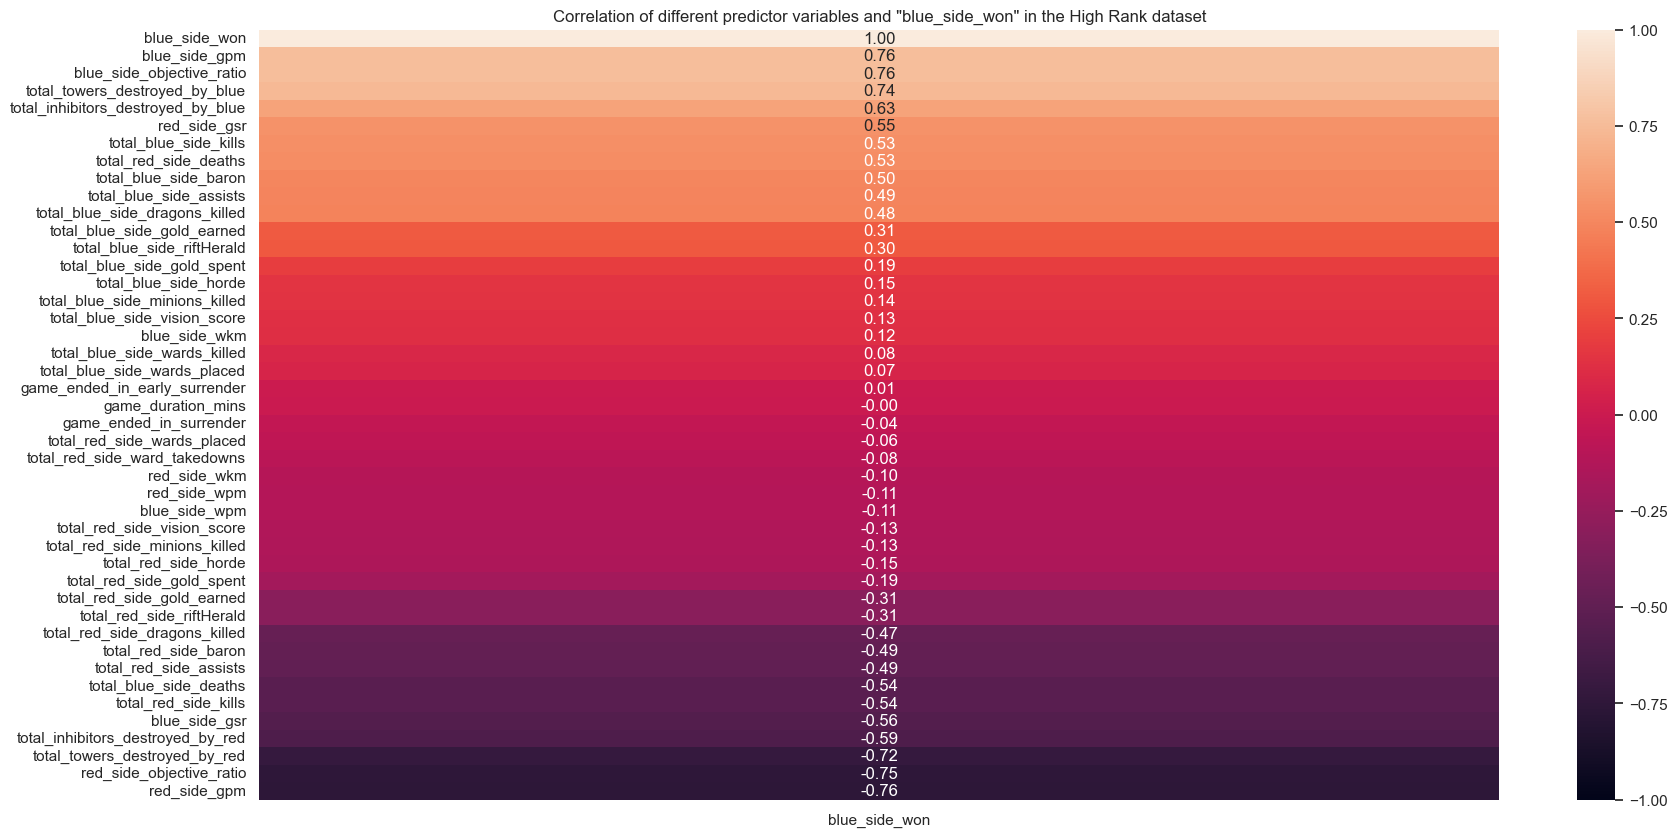

In [34]:
#visualize the correlation from above 
plt.figure(figsize=(20, 10))
sns.heatmap(high_rank.corr()[['blue_side_won']].sort_values(by='blue_side_won',ascending=False)
            ,vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('Correlation of different predictor variables and "blue_side_won" in the High Rank dataset')
plt.show()

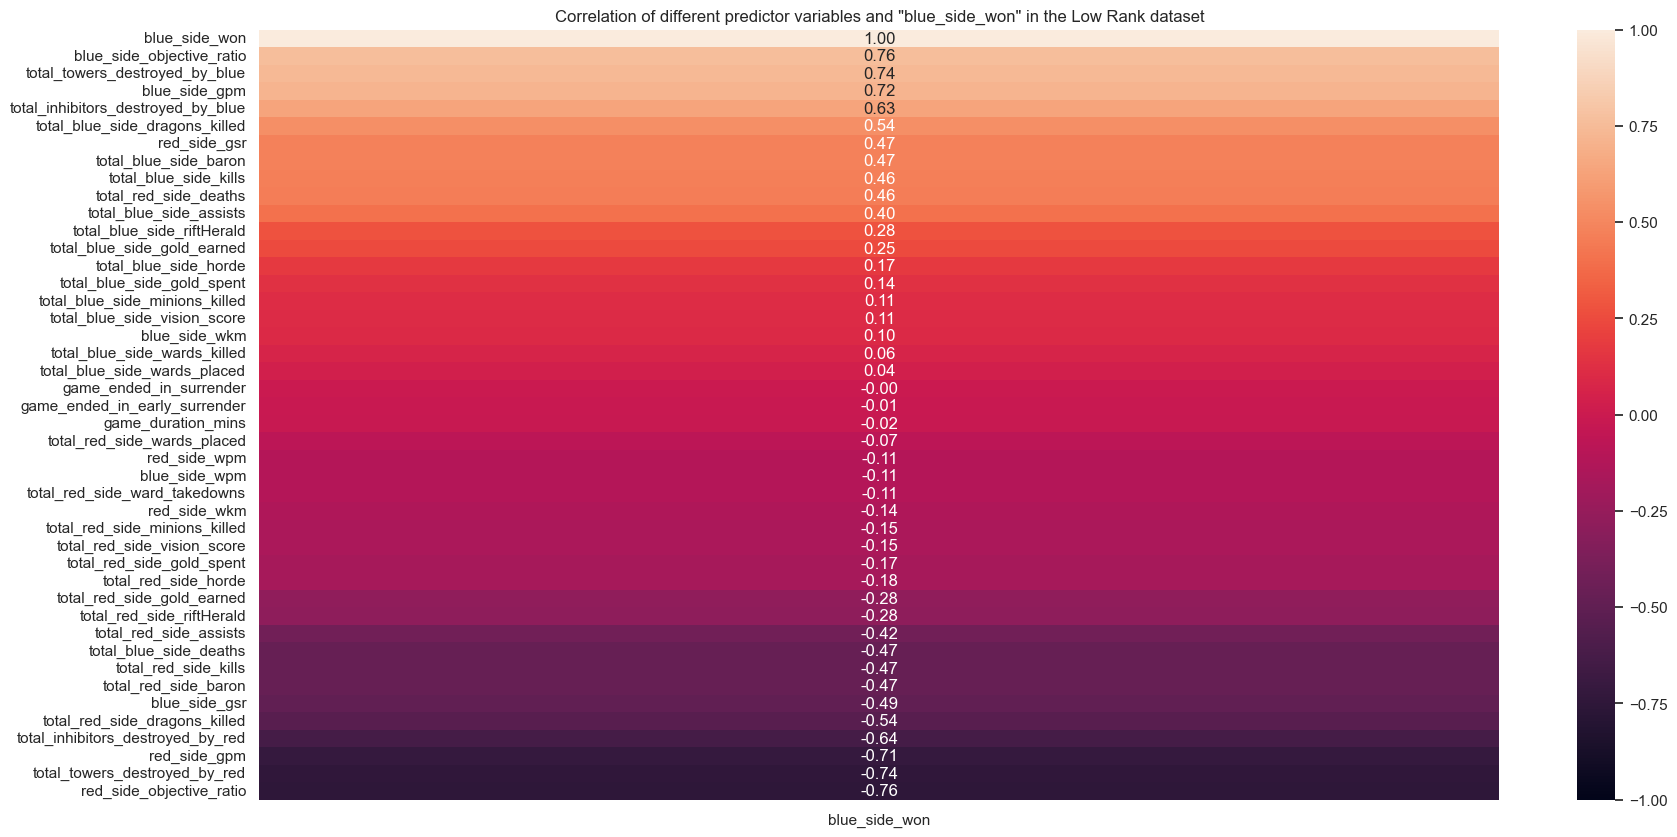

In [35]:
#visualize the correlation from above 
plt.figure(figsize=(20, 10))
sns.heatmap(low_rank.corr()[['blue_side_won']].sort_values(by='blue_side_won',ascending=False)
            ,vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('Correlation of different predictor variables and "blue_side_won" in the Low Rank dataset')
plt.show()

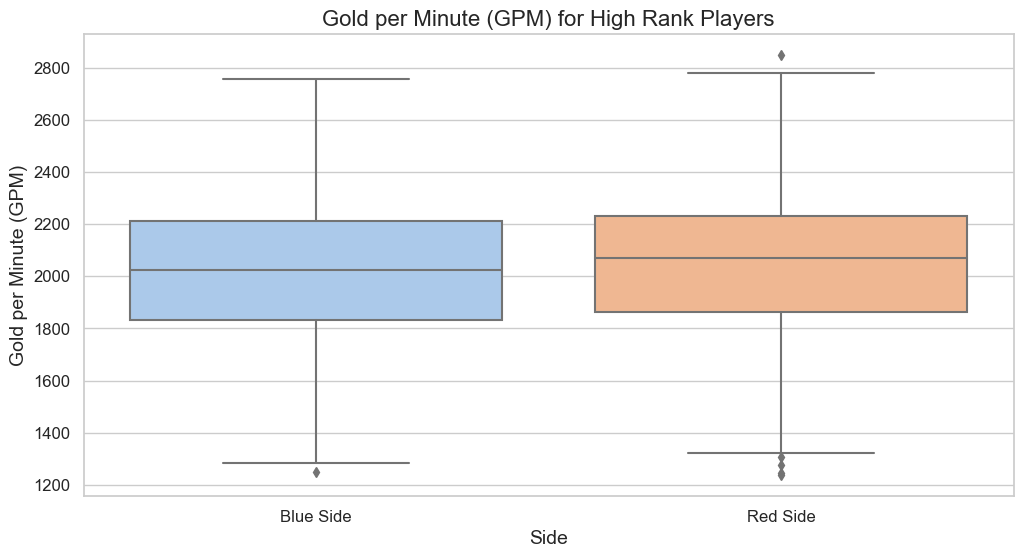

In [39]:
sns.set_theme(style="whitegrid")

#gpm for high rank players
plt.figure(figsize=(12, 6))
sns.boxplot(data=high_rank[['blue_side_gpm', 'red_side_gpm']], palette="pastel")
plt.title('Gold per Minute (GPM) for High Rank Players', fontsize=16)
plt.xlabel('Side', fontsize=14)
plt.ylabel('Gold per Minute (GPM)', fontsize=14)
plt.xticks([0, 1], ['Blue Side', 'Red Side'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

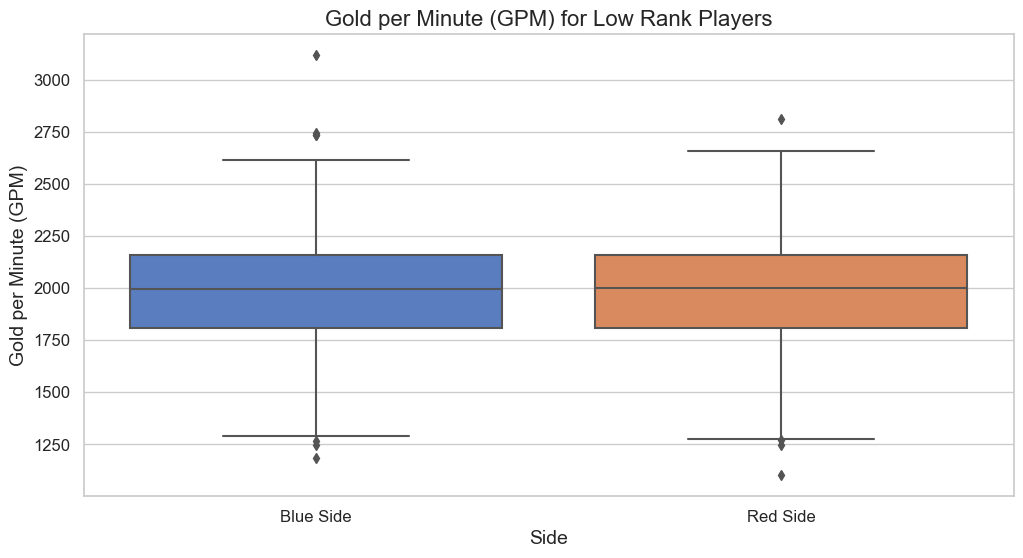

In [40]:
#gpm box plot for low rank
plt.figure(figsize=(12, 6))
sns.boxplot(data=low_rank[['blue_side_gpm', 'red_side_gpm']], palette="muted")
plt.title('Gold per Minute (GPM) for Low Rank Players', fontsize=16)
plt.xlabel('Side', fontsize=14)
plt.ylabel('Gold per Minute (GPM)', fontsize=14)
plt.xticks([0, 1], ['Blue Side', 'Red Side'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

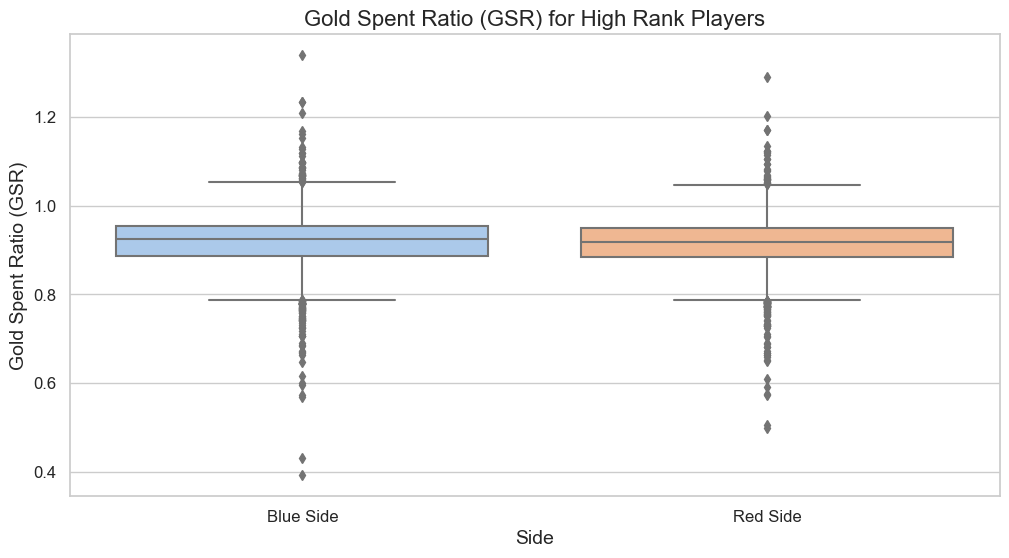

In [41]:
#gsr box plot for high rank
plt.figure(figsize=(12, 6))
sns.boxplot(data=high_rank[['blue_side_gsr', 'red_side_gsr']], palette="pastel")
plt.title('Gold Spent Ratio (GSR) for High Rank Players', fontsize=16)
plt.xlabel('Side', fontsize=14)
plt.ylabel('Gold Spent Ratio (GSR)', fontsize=14)
plt.xticks([0, 1], ['Blue Side', 'Red Side'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

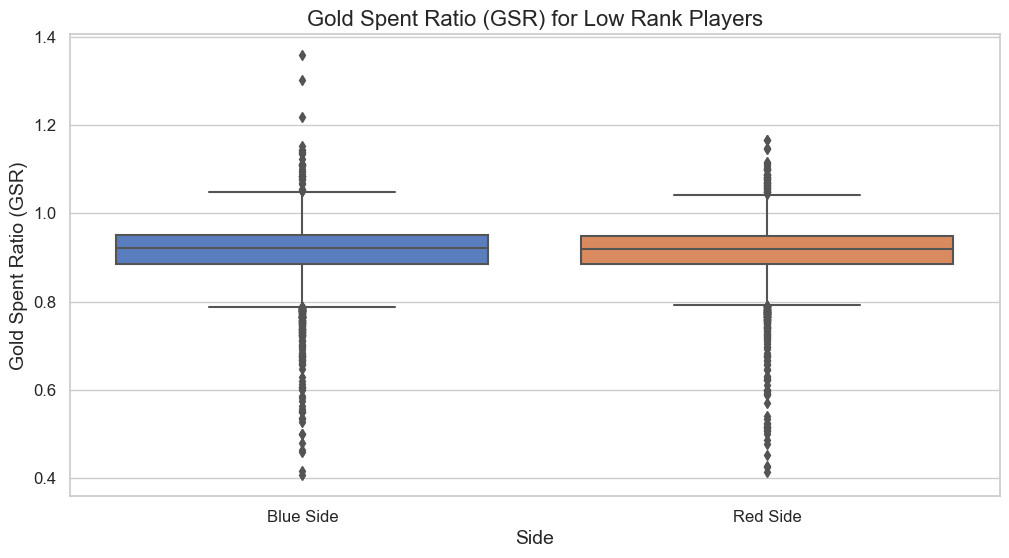

In [42]:
#gsm box plot for low rank
plt.figure(figsize=(12, 6))
sns.boxplot(data=low_rank[['blue_side_gsr', 'red_side_gsr']], palette="muted")
plt.title('Gold Spent Ratio (GSR) for Low Rank Players', fontsize=16)
plt.xlabel('Side', fontsize=14)
plt.ylabel('Gold Spent Ratio (GSR)', fontsize=14)
plt.xticks([0, 1], ['Blue Side', 'Red Side'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

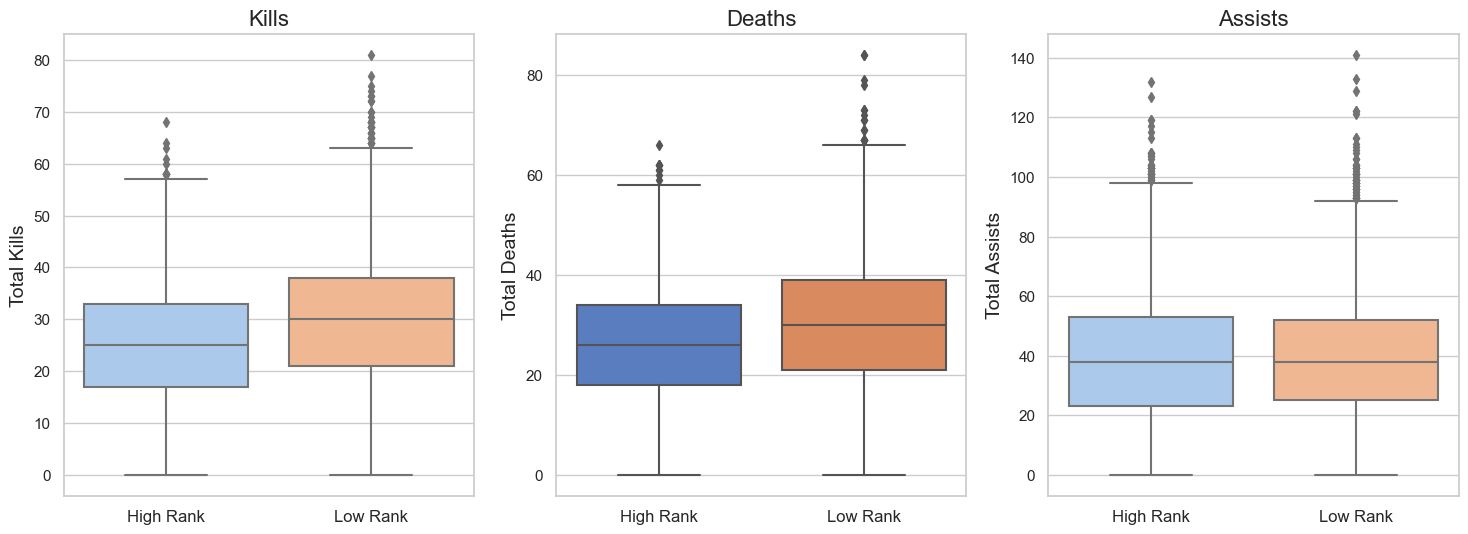

In [44]:
#kills, deaths, and assists for high and low rank datasets
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#kills box plot
sns.boxplot(data=[high_rank['total_blue_side_kills'], low_rank['total_blue_side_kills']], ax=axes[0], palette="pastel")
axes[0].set_title('Kills', fontsize=16)
axes[0].set_xticklabels(['High Rank', 'Low Rank'], fontsize=12)
axes[0].set_ylabel('Total Kills', fontsize=14)

#total deaths box plot
sns.boxplot(data=[high_rank['total_blue_side_deaths'], low_rank['total_blue_side_deaths']], ax=axes[1], palette="muted")
axes[1].set_title('Deaths', fontsize=16)
axes[1].set_xticklabels(['High Rank', 'Low Rank'], fontsize=12)
axes[1].set_ylabel('Total Deaths', fontsize=14)

#total assists box plot
sns.boxplot(data=[high_rank['total_blue_side_assists'], low_rank['total_blue_side_assists']], ax=axes[2], palette="pastel")
axes[2].set_title('Assists', fontsize=16)
axes[2].set_xticklabels(['High Rank', 'Low Rank'], fontsize=12)
axes[2].set_ylabel('Total Assists', fontsize=14)

plt.show()

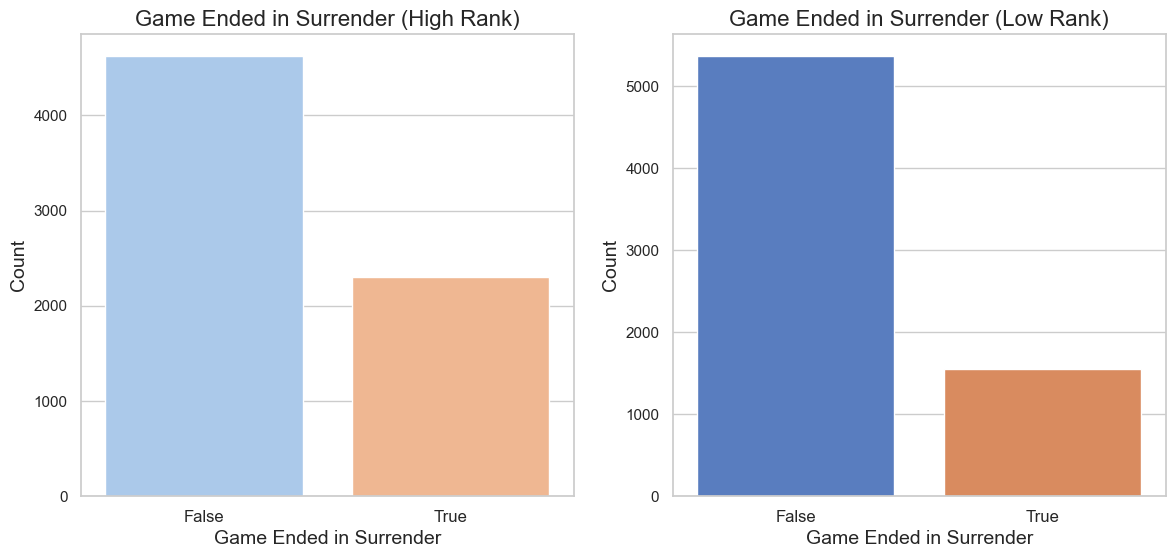

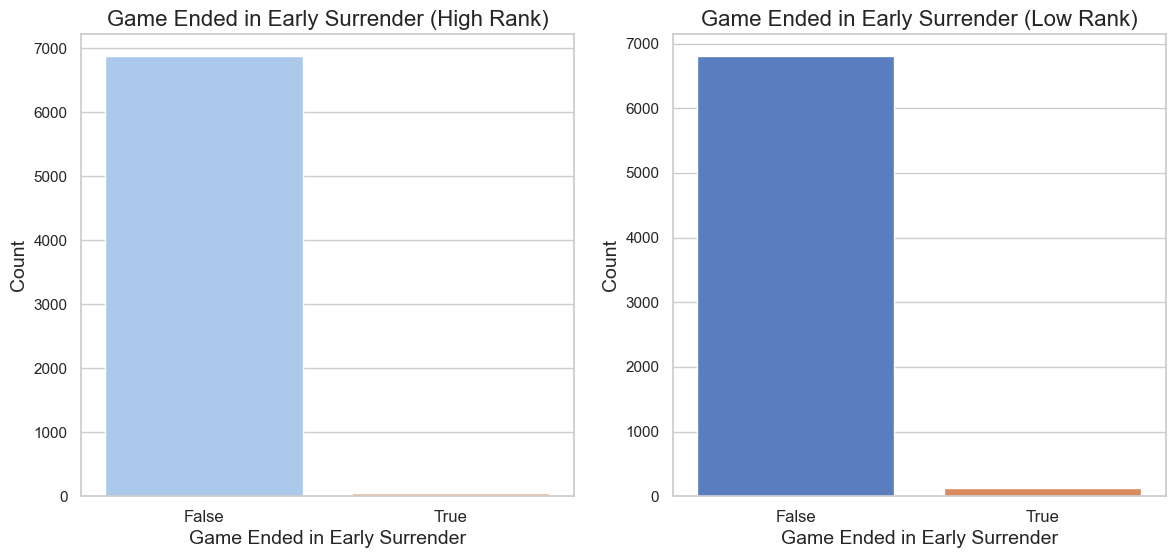

In [47]:
#count plot for game ended in surrender and early surrender for high and low rank datasets
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#game ended in surrender bar plot
sns.countplot(x='game_ended_in_surrender', data=high_rank, ax=axes[0], palette="pastel")
axes[0].set_title('Game Ended in Surrender (High Rank)', fontsize=16)
axes[0].set_xlabel('Game Ended in Surrender', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].set_xticklabels(['False', 'True'], fontsize=12)

sns.countplot(x='game_ended_in_surrender', data=low_rank, ax=axes[1], palette="muted")
axes[1].set_title('Game Ended in Surrender (Low Rank)', fontsize=16)
axes[1].set_xlabel('Game Ended in Surrender', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].set_xticklabels(['False', 'True'], fontsize=12)

plt.show()

#game ended in early surrender
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x='game_ended_in_early_surrender', data=high_rank, ax=axes[0], palette="pastel")
axes[0].set_title('Game Ended in Early Surrender (High Rank)', fontsize=16)
axes[0].set_xlabel('Game Ended in Early Surrender', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].set_xticklabels(['False', 'True'], fontsize=12)

sns.countplot(x='game_ended_in_early_surrender', data=low_rank, ax=axes[1], palette="muted")
axes[1].set_title('Game Ended in Early Surrender (Low Rank)', fontsize=16)
axes[1].set_xlabel('Game Ended in Early Surrender', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].set_xticklabels(['False', 'True'], fontsize=12)

plt.show()


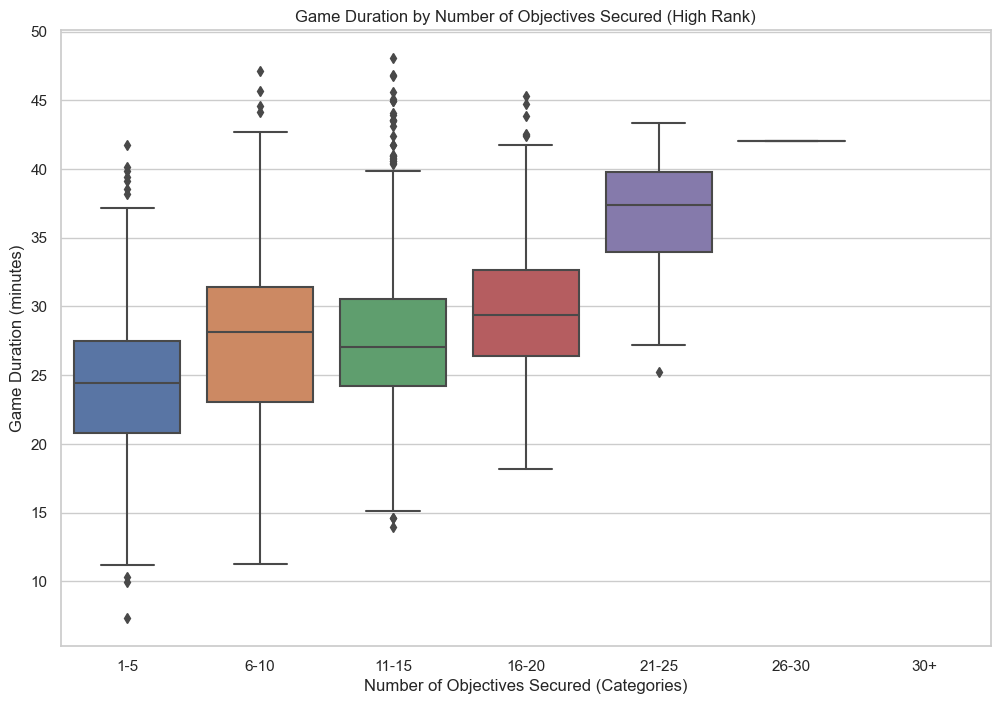

In [49]:
import pandas as pd
import numpy as np

# Adding up objectives for a simpler example
high_rank['total_objectives'] = (high_rank['total_blue_side_dragons_killed'] +
                                 high_rank['total_blue_side_baron'] +
                                 high_rank['total_towers_destroyed_by_blue'] +
                                 high_rank['total_inhibitors_destroyed_by_blue'])

# Categorizing total objectives into groups
high_rank['objective_category'] = pd.cut(high_rank['total_objectives'], bins=[0, 5, 10, 15, 20, 25, 30, np.inf], labels=['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '30+'])

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(data=high_rank, x='objective_category', y='game_duration_mins')
plt.title('Game Duration by Number of Objectives Secured (High Rank)')
plt.xlabel('Number of Objectives Secured (Categories)')
plt.ylabel('Game Duration (minutes)')
plt.show()


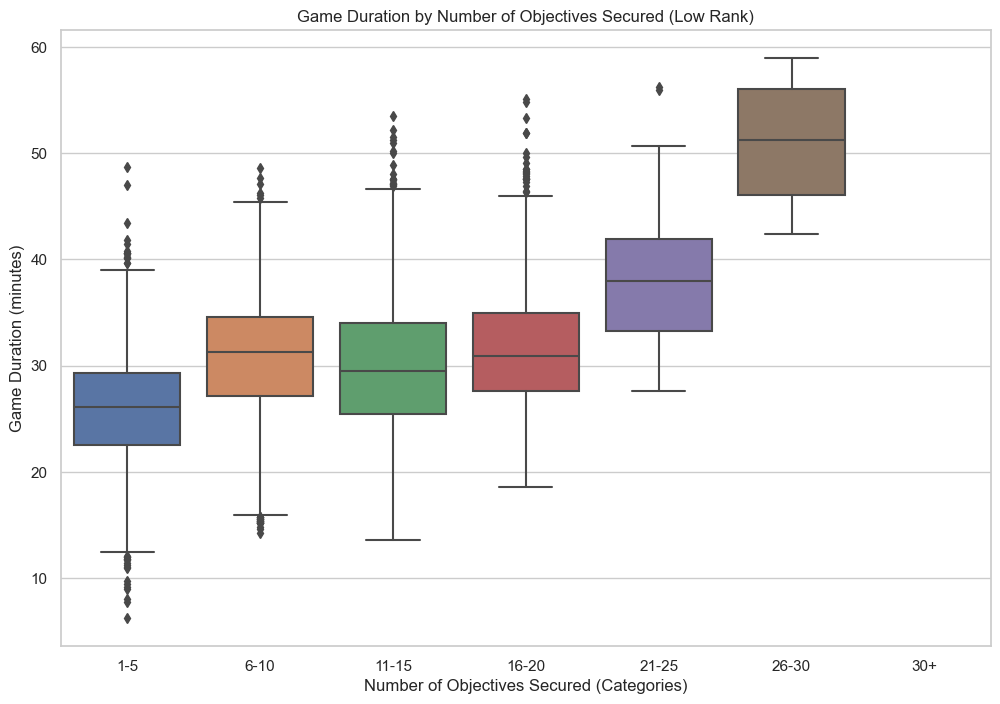

In [50]:
import pandas as pd
import numpy as np

# Adding up objectives for low rank
low_rank['total_objectives'] = (low_rank['total_red_side_dragons_killed'] +
                                low_rank['total_red_side_baron'] +
                                low_rank['total_towers_destroyed_by_red'] +
                                low_rank['total_inhibitors_destroyed_by_red'])

# Categorizing total objectives into groups - Adjust bins if necessary based on data distribution
low_rank['objective_category'] = pd.cut(low_rank['total_objectives'], bins=[0, 5, 10, 15, 20, 25, 30, np.inf], labels=['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '30+'])

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(data=low_rank, x='objective_category', y='game_duration_mins')
plt.title('Game Duration by Number of Objectives Secured (Low Rank)')
plt.xlabel('Number of Objectives Secured (Categories)')
plt.ylabel('Game Duration (minutes)')
plt.show()

